In [16]:
import pandas as pd

data = pd.read_csv('ev_charging_patterns.csv')
energy_trungvi = data['Energy Consumed (kWh)'].median()
data['Energy Consumed (kWh)'] = data['Energy Consumed (kWh)'].fillna(energy_trungvi)
chargingrate_trungvi = data['Charging Rate (kW)'].median()
data['Charging Rate (kW)'] = data['Charging Rate (kW)'].fillna(chargingrate_trungvi)
distance_trungvi = data['Distance Driven (since last charge) (km)'].median()
data['Distance Driven (since last charge) (km)'] = data['Distance Driven (since last charge) (km)'].fillna(distance_trungvi)

inputs = data[['Battery Capacity (kWh)', 'Charging Duration (hours)', 'Charging Rate (kW)', 
               'Distance Driven (since last charge) (km)', 'Temperature (°C)', 'Vehicle Age (years)']]

output = data['Energy Consumed (kWh)']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(inputs)
X_train, X_test, y_train, y_test = train_test_split(X, output, test_size=0.2, random_state=42)



In [17]:
import joblib
model_linear = joblib.load('linear_model.pkl')
rf_model = joblib.load('rf_model.pkl')
xgb_model = joblib.load('xgb_model.pkl')
svm_model = joblib.load('svm_model.pkl')


Using 1056 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 264/264 [02:01<00:00,  2.18it/s]


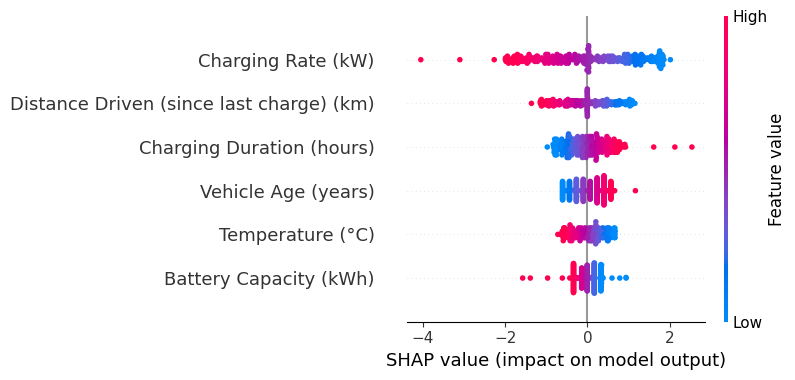

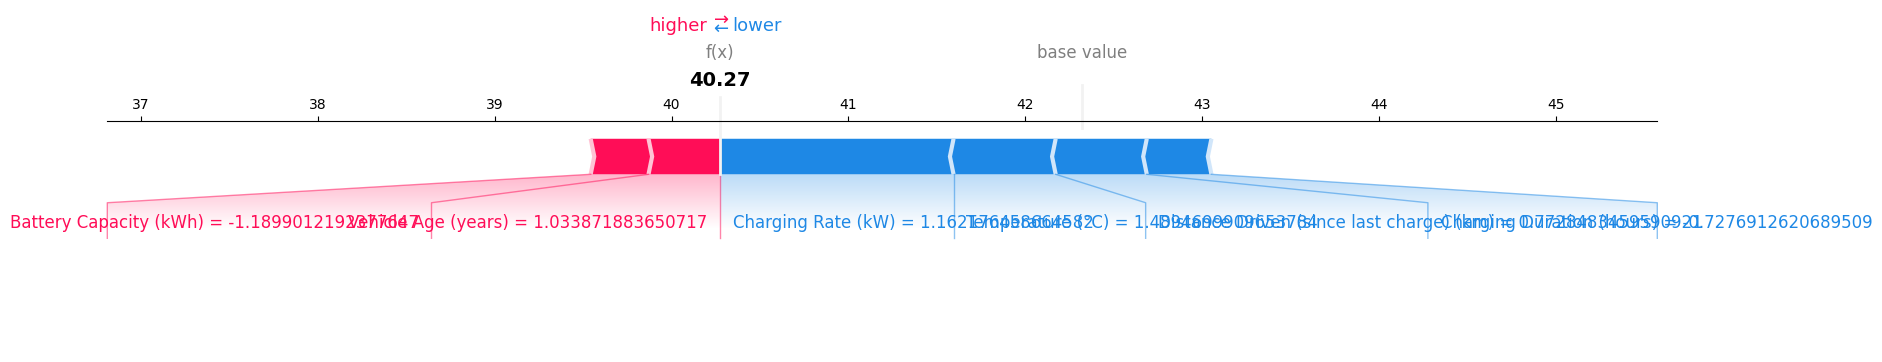

In [18]:
import shap
X_test = pd.DataFrame(X_test, columns=inputs.columns)
explainer_linear = shap.KernelExplainer(model_linear.predict, X_train)

shap_values_linear = explainer_linear.shap_values(X_test)

shap.summary_plot(shap_values_linear, X_test, feature_names=inputs.columns)

shap.force_plot(explainer_linear.expected_value, shap_values_linear[0], X_test.iloc[0, :], matplotlib=True)



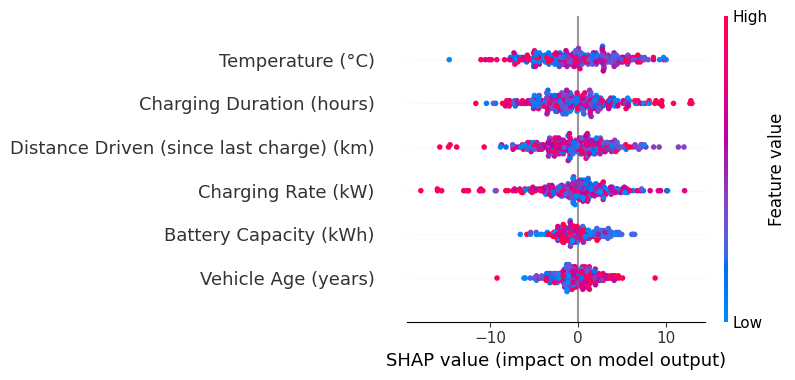

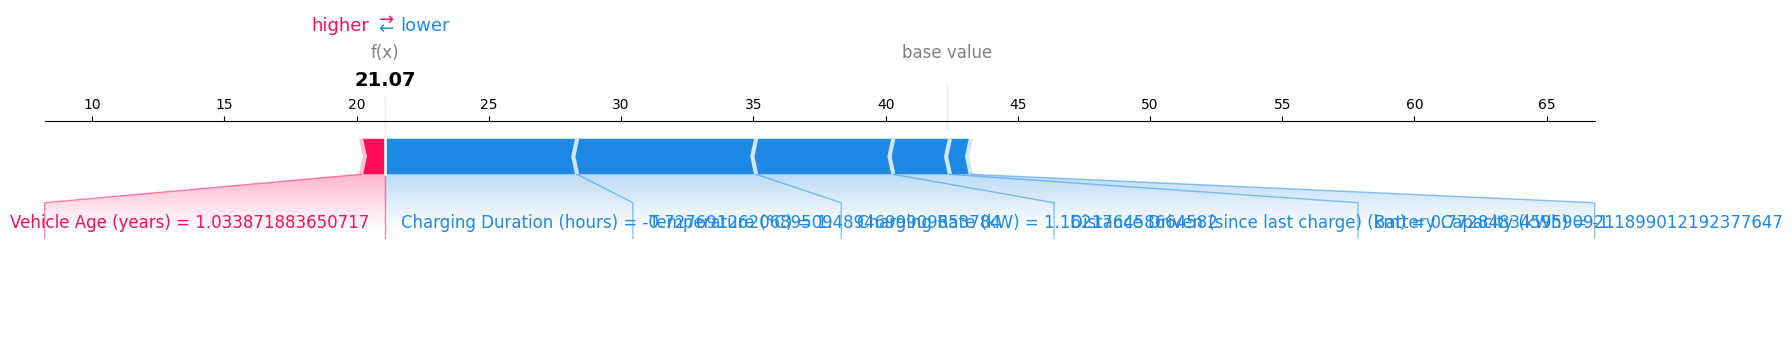

In [19]:
explainer_xgb = shap.TreeExplainer(xgb_model)

shap_values_xgb = explainer_xgb.shap_values(X_test)

shap.summary_plot(shap_values_xgb, X_test, feature_names=inputs.columns)

shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0], X_test.iloc[0, :], matplotlib=True)


In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class EnergyDNN(nn.Module):
#     def __init__(self, input_size):
#         super(EnergyDNN, self).__init__()
#         self.fc1 = nn.Linear(input_size, 256)
#         self.bn1 = nn.BatchNorm1d(256)
#         self.dropout1 = nn.Dropout(0.3)
        
#         self.fc2 = nn.Linear(256, 128)
#         self.bn2 = nn.BatchNorm1d(128)
#         self.dropout2 = nn.Dropout(0.3)
        
#         self.fc3 = nn.Linear(128, 64)
#         self.bn3 = nn.BatchNorm1d(64)
#         self.dropout3 = nn.Dropout(0.3)
        
#         self.fc4 = nn.Linear(64, 1)
    
#     def forward(self, x):
#         x = F.relu(self.bn1(self.fc1(x)))
#         x = self.dropout1(x)
        
#         x = F.relu(self.bn2(self.fc2(x)))
#         x = self.dropout2(x)
        
#         x = F.relu(self.bn3(self.fc3(x)))
#         x = self.dropout3(x)
        
#         x = self.fc4(x)
#         return x
# X_train, X_test, y_train, y_test = train_test_split(X, output, test_size=0.2, random_state=42)
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# input_size = 6 

# model_nn = EnergyDNN(input_size)
# model_nn.load_state_dict(torch.load('energy_dnn_model.pth'))
# model_nn.eval() 

# explainer_dnn = shap.DeepExplainer(model_nn, X_train_tensor)

# shap_values_dnn = explainer_dnn.shap_values(X_test_tensor)

# shap.summary_plot(shap_values_dnn, X_test_tensor.numpy(), feature_names=inputs.columns)

# shap.force_plot(explainer_dnn.expected_value[0], shap_values_dnn[0][0], X_test_tensor[0].numpy(), matplotlib=True)


C:\Users\DAT\AppData\Local\Temp\ipykernel_1444\1110452750.py:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_nn.load_state_dict(torch.load('energy_dnn_model.pth'))


AssertionError: The SHAP explanations do not sum up to the model's output! This is either because of a rounding error or because an operator in your computation graph was not fully supported. If the sum difference of %f is significant compared to the scale of your model outputs, please post as a github issue, with a reproducible example so we can debug it. Used framework: pytorch - Max. diff: 33.382401403039694 - Tolerance: 0.01

Using 1056 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 264/264 [28:36<00:00,  6.50s/it]


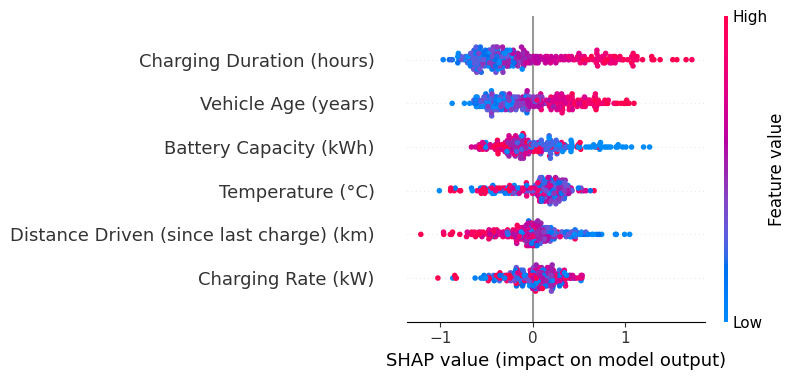

KeyError: 0